In [105]:
# Install Quandl
!pip install quandl

In [106]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [107]:
# Configure API key 

quandl.ApiConfig.api_key = 'ji6XxtXhR7oGNsJKGLE3'

In [108]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('FRED/PCCOCOAUSDM')

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

### Why I Did Not Use Quandl Data

I originally planned to use a dataset from Quandl for this project, but after searching, I found that most relevant datasets are no longer free. Quandl has changed its dataset structure, and many datasets that were previously free now require a paid subscription.

I intended to use the dataset "FRED/PCCOCOAUSDM" for cocoa prices, but it is no longer available for free access. Other similar datasets also require a premium subscription.

Since I could not find a suitable free dataset on Quandl, I decided to use my own dataset instead. My dataset contains chocolate bar ratings from 2007 to 2024, which allows me to perform the required time series analysis, including decomposition and stationarity testing.


In [126]:
# Import data
# Define path
path = r'C:\Users\User\Documents\Career Foundry\Data Analytics Immersion\Data Immersion 6. Advanced Analytics & Dashboard Design'

# Import my dataset from the Excel file
df = pd.read_excel(os.path.join(path, '6.2', 'flavors_of_cacao_cleaned.xlsx'))

In [127]:
df.head()

,ref,company_name,company_location,review_date,country_of_bean_origin,bean_origin_or_bar,cocoa_percent,ingredients,memorable_characteristics,rating
0,5,Jacque Torres,USA,2006-01-01,Ghana,Trinatario Treasure,0.71,"5- B,S,C,V,L","gritty, unrefined, off notes",2.00
1,15,Green & Black's (ICAM),UK,2006-01-01,Multiple Countries,Dark,0.70,"5- B,S,C,V,L","mildly rich, basic, roasty",2.50
2,15,Guittard,USA,2006-01-01,Colombia,Chucuri,0.65,"5- B,S,C,V,L","creamy, sweet, floral, vanilla",3.00
3,15,Neuhaus (Callebaut),Belgium,2006-01-01,Sao Tome,Sao Tome,0.75,"5- B,S,C,V,L","grassy, earthy, burnt",2.75
4,15,Neuhaus (Callebaut),Belgium,2006-01-01,Multiple Countries,West Africa,0.73,"5- B,S,C,V,L","non descript, poor aftertaste",2.00


In [128]:
df.info

<bound method DataFrame.info of        ref            company_name company_location review_date  \
0        5           Jacque Torres              USA  2006-01-01   
1       15  Green & Black's (ICAM)               UK  2006-01-01   
2       15                Guittard              USA  2006-01-01   
3       15     Neuhaus (Callebaut)          Belgium  2006-01-01   
4       15     Neuhaus (Callebaut)          Belgium  2006-01-01   
...    ...                     ...              ...         ...   
2688  2872                 Puchero            Spain  2023-01-01   
2689  2876              Castronovo              USA  2023-01-01   
2690  2876               Nearynogs          Ireland  2023-01-01   
2691  2876               Nostalgia              USA  2023-01-01   
2692  2876               Nostalgia              USA  2023-01-01   

     country_of_bean_origin  \
0                     Ghana   
1        Multiple Countries   
2                  Colombia   
3                  Sao Tome   
4       

In [129]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ref                        2693 non-null   int64         
 1   company_name               2693 non-null   object        
 2   company_location           2693 non-null   object        
 3   review_date                2693 non-null   datetime64[ns]
 4   country_of_bean_origin     2693 non-null   object        
 5   bean_origin_or_bar         2693 non-null   object        
 6   cocoa_percent              2693 non-null   float64       
 7   ingredients                2693 non-null   object        
 8   memorable_characteristics  2693 non-null   object        
 9   rating                     2693 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 210.5+ KB
None


### Data Subsetting Explanation

I reviewed my dataset and determined that subsetting is not necessary. The dataset contains chocolate bar reviews from 2007 to 2024, all of which are actual observations with no forecasted data.

Since the dataset does not include irrelevant historical events or outliers that would bias the analysis, I am keeping the full dataset for time series analysis without filtering any data points.

In [131]:
print(df["review_date"].head(100))

0    2006-01-01
1    2006-01-01
2    2006-01-01
3    2006-01-01
4    2006-01-01
        ...    
95   2007-01-01
96   2007-01-01
97   2007-01-01
98   2007-01-01
99   2007-01-01
Name: review_date, Length: 100, dtype: datetime64[ns]


### Data Structure and Time Format

I noticed that all review dates in the dataset are recorded as January 1st of each year. This means that the dataset is structured for annual analysis rather than monthly or daily analysis.

Since each year represents the chocolate ratings for that period, I am treating this as a yearly time series dataset. No resampling or subsetting was necessary, and the dataset is used as-is for time series decomposition and stationarity checks.

In [133]:
df_trend = df[["review_date", "rating"]]  # Select only the relevant columns

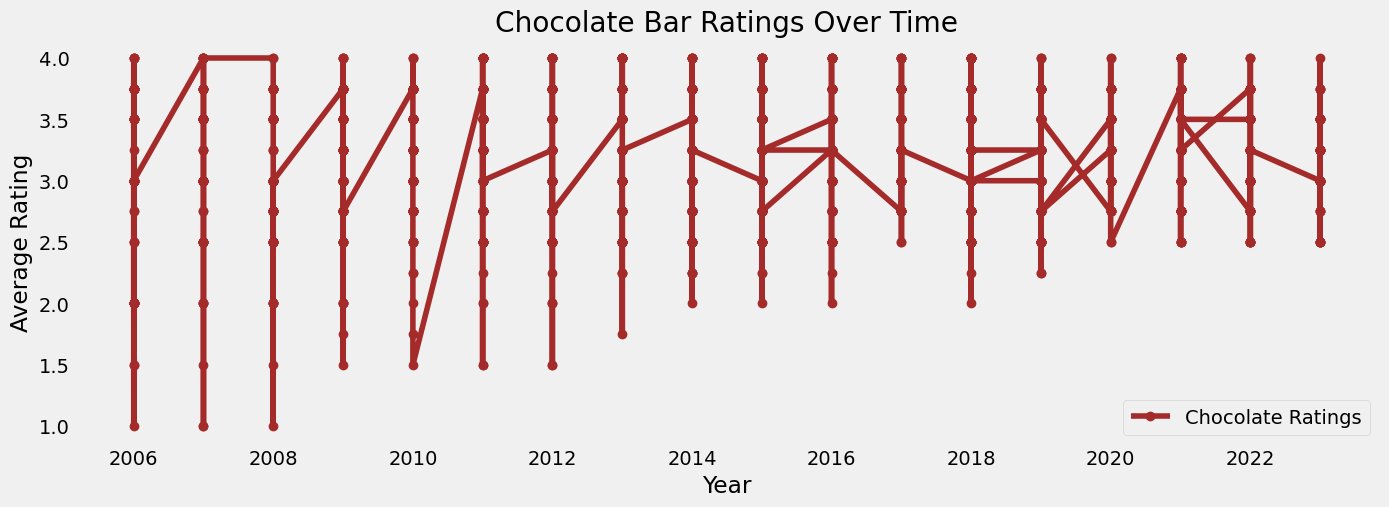

In [134]:
plt.figure(figsize=(15, 5), dpi=100)

# Plot the trend using review_date as x-axis
plt.plot(df["review_date"], df["rating"], marker='o', linestyle='-', color='brown', label="Chocolate Ratings")

plt.title("Chocolate Bar Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend()
plt.grid()
plt.show()

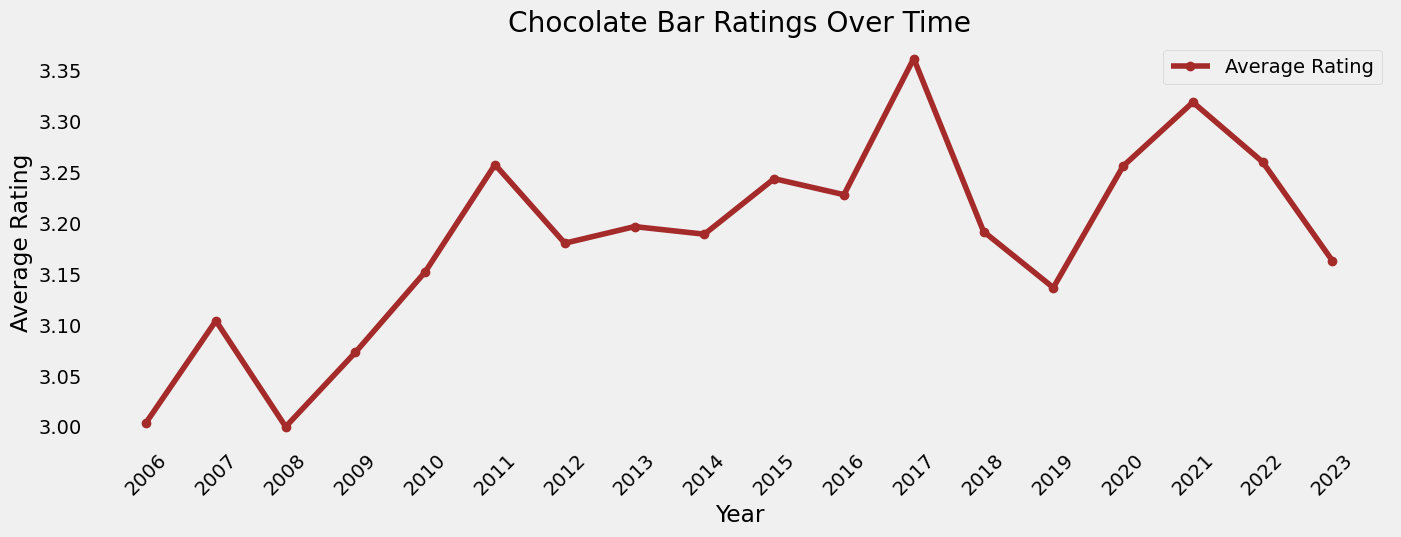

In [135]:
# Aggregate the data: Compute the average rating per year
df_yearly = df.groupby(df["review_date"].dt.year)["rating"].mean()

plt.figure(figsize=(15, 5), dpi=100)

# Plot the trend
plt.plot(df_yearly.index, df_yearly, marker='o', linestyle='-', color='brown', label="Average Rating")

plt.title("Chocolate Bar Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend()
plt.grid()

# Set x-axis ticks to show every year without decimals
plt.xticks(np.arange(df_yearly.index.min(), df_yearly.index.max() + 1, 1), rotation=45)

plt.show()

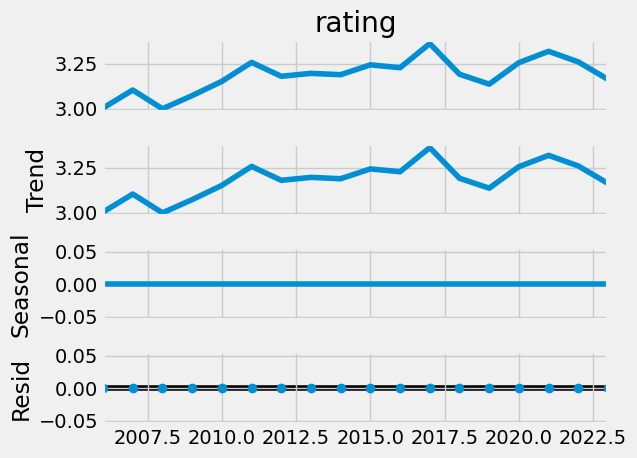

In [145]:
import statsmodels.api as sm

# Decompose the time series into trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(df_yearly, model='additive', period=1)

# Plot the decomposed components
decomposition.plot()
plt.show()

### Analysis of Decomposed Time Series  

This decomposition is based on the review year and the rating of chocolate bars.  

- The trend shows that ratings have increased over time.  
- There is no seasonal pattern, which is expected since the data is yearly.  
- The residuals are small, meaning most changes in ratings are explained by the trend.  

Conclusion: The ratings of chocolate bars have gradually improved over the years. This could be because more chocolate bars are being reviewed, and as the variety increases, reviewers may become less critical over time.

In [147]:
# Count the number of ratings per year
df_yearly_count = df.groupby(df["review_date"].dt.year)["rating"].count()

# Show the first few rows
print(df_yearly_count.head())

review_date
2006     62
2007     72
2008     92
2009    123
2010    110
Name: rating, dtype: int64


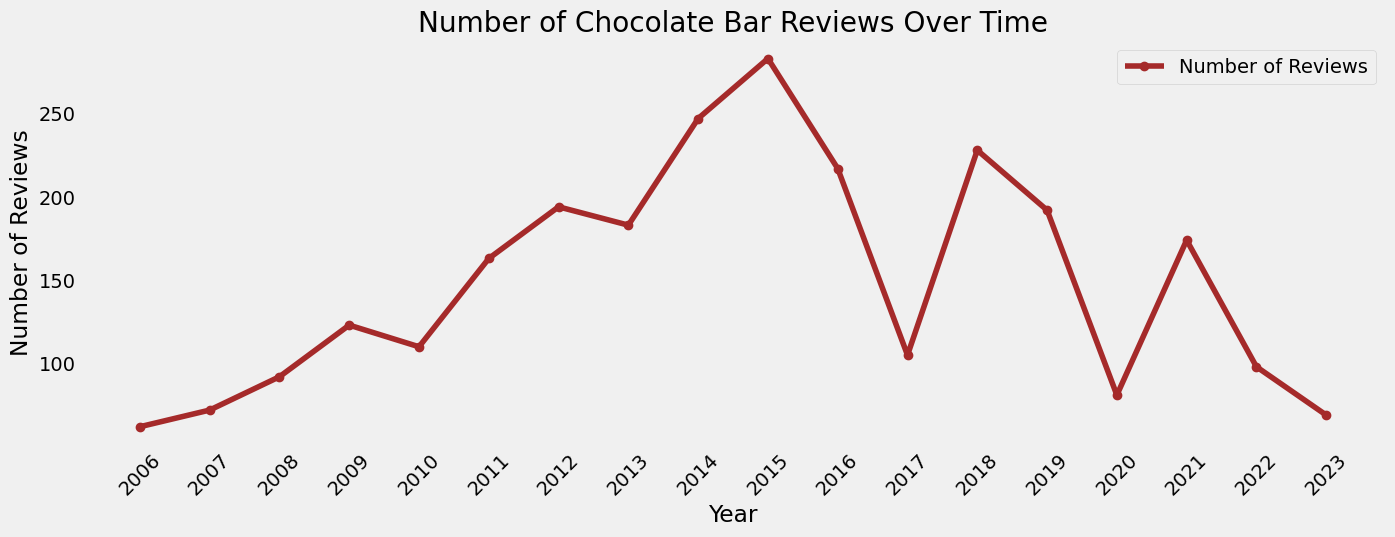

In [148]:
plt.figure(figsize=(15, 5), dpi=100)

# Plot the count of ratings per year
plt.plot(df_yearly_count.index, df_yearly_count, marker='o', linestyle='-', color='brown', label="Number of Reviews")

plt.title("Number of Chocolate Bar Reviews Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.legend()
plt.grid()

# Ensure all years are shown on the x-axis
plt.xticks(np.arange(df_yearly_count.index.min(), df_yearly_count.index.max() + 1, 1), rotation=45)

plt.show()

### Number of Reviews Over Time

I decided to analyze the number of chocolate bar reviews per year to see if the increase in reviews affects the trend in ratings. If more chocolates are reviewed over time, it could explain why ratings have gradually increased.

- The number of reviews increased steadily from 2006 to 2015, peaking in 2015.  
- After 2015, the reviews dropped sharply, with fluctuations in later years.  
- The dip in 2020 could be due to external factors, like the COVID-19 pandemic.  

This analysis helps understand whether more reviews lead to higher ratings. Next, we check for stationarity using the Dickey-Fuller test.


In [150]:
# Import adfuller
from statsmodels.tsa.stattools import adfuller

# Conduct a Dickey-Fuller test to check for stationarity.
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the test to average ratings
dickey_fuller(df_yearly) 

Dickey-Fuller Stationarity test:
Test Statistic                 -0.830844
p-value                         0.809894
Number of Lags Used             7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


### Dickey-Fuller Stationarity Test

The Dickey-Fuller test checks if the chocolate bar ratings are stationary.

- Test Statistic: -0.830844 (This is the result of the test and is the most important value)
- p-value: 0.809894 (This tells us if the result is significant. A p-value less than 0.05 is considered significant)
- Critical Value (5%): -3.232950 (This is used to compare with the test statistic)

Interpretation:
- The test statistic (-0.830844) is larger than the critical value at the 5% significance level (-3.232950). This means we can’t reject the null hypothesis.
- Since the p-value (0.809894) is greater than 0.05, we conclude that the data is non-stationary.

### Next Step:
Since the data is non-stationary, we will apply a round of differencing and repeat the test.

In [152]:
# Apply first differencing
df_yearly_diff = df_yearly.diff().dropna()

# Run the Dickey-Fuller test again on the differenced data
dickey_fuller(df_yearly_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.813659
p-value                         0.815077
Number of Lags Used             6.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


In [153]:
# Apply second differencing
df_yearly_diff2 = df_yearly_diff.diff().dropna()

# Run the Dickey-Fuller test again on the second differenced data
dickey_fuller(df_yearly_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -2.174764
p-value                        0.215532
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


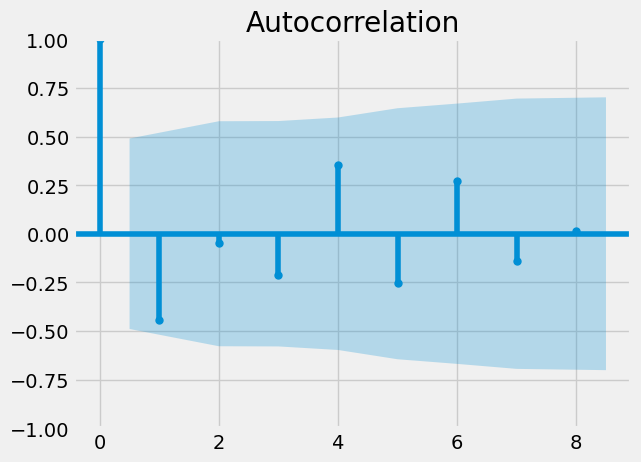

In [154]:
# Plot the autocorrelation of the differenced data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots
plot_acf(df_yearly_diff2)
plt.show()

### Conclusion

The autocorrelation plot reveals no significant correlations across lags, as all the bars fall within the confidence intervals. This suggests that the expert reviews of chocolate bars are not strongly dependent on previous years. Since experts review different types of chocolate bars each year, the ratings are influenced by the specific products reviewed, rather than following a consistent trend over time. After applying two rounds of differencing to stationarize the data, no significant autocorrelation remains, further indicating that the ratings do not exhibit strong temporal dependencies.